In [1]:
import duckdb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#path = "/home/manat/projects/obsq/work/dev/data/data.duckdb"
path = "/home/manat/projects/obsq/work/pipe_test/data/data.duckdb"
from  matplotlib.ticker import FuncFormatter


In [2]:
con = duckdb.connect(path)
df = con.execute("""SELECT* FROM preprocessed.gbif_post_inat_observers""" ).df()
df = df.drop(columns= 'geom')
con.close()

In [3]:
def save_plt(title:str, type:str = 'dist'):
    output = "/home/manat/projects/obsq/work/dev/data/eda/preprocessed"
    plt.suptitle(f"Distribution of {title}")
    plt.savefig(f"{output}/{title}_{type}.jpg", dpi = 300, bbox_inches="tight")


In [4]:
df.shape

(819, 40)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 40 columns):
 #   Column                            Non-Null Count  Dtype                          
---  ------                            --------------  -----                          
 0   gbifID                            819 non-null    int64                          
 1   occurrenceID                      819 non-null    object                         
 2   year                              819 non-null    int64                          
 3   month                             819 non-null    int64                          
 4   day                               819 non-null    int64                          
 5   recordedBy                        819 non-null    object                         
 6   recordedByID                      0 non-null      object                         
 7   occurrenceRemarks                 64 non-null     object                         
 8   eventDate           

In [6]:
df.describe()

,gbifID,year,month,day,identificationID,dateIdentified,catalogNumber,taxonID,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,media_count,user_id,num_identification_agreements,num_identification_disagreements
count,8.190000e+02,819.000000,819.000000,819.000000,818.0,818,8.190000e+02,8.190000e+02,819.000000,819.000000,819.000000,818.0,8.190000e+02,819.000000,819.000000
mean,4.955459e+09,2024.170940,6.446886,13.053724,563536671.353301,2024-10-19 18:29:02.424205,2.508354e+08,8.711214e+04,45.545704,-73.155990,81.437118,1.0,5.776420e+06,1.332112,0.006105
min,3.079828e+09,2021.000000,4.000000,1.000000,164233678.0,2021-04-08 22:57:13,7.334348e+07,4.743500e+04,45.534814,-73.173407,0.000000,1.0,4.792700e+04,1.000000,0.000000
25%,4.920637e+09,2023.000000,6.000000,6.000000,503228773.25,2024-06-19 21:53:24.750000,2.204751e+08,4.988300e+04,45.541430,-73.160280,4.000000,1.0,3.146893e+06,1.000000,0.000000
50%,5.187724e+09,2025.000000,6.000000,12.000000,644709531.5,2025-06-06 23:34:20.500000,2.874337e+08,5.441200e+04,45.542653,-73.154808,6.000000,1.0,5.921171e+06,1.000000,0.000000
75%,5.230196e+09,2025.000000,7.000000,19.000000,650596438.5,2025-06-18 01:13:50,2.899500e+08,7.753450e+04,45.549925,-73.152060,17.000000,1.0,8.371251e+06,2.000000,0.000000
max,5.897492e+09,2025.000000,8.000000,31.000000,716898613.0,2025-10-24 23:33:43,3.228575e+08,1.561772e+06,45.569808,-73.125251,2427.000000,1.0,9.654738e+06,5.000000,1.000000
std,5.334573e+08,1.193948,1.009999,7.672040,137310961.364397,NaN,6.168081e+07,1.432266e+05,0.007438,0.008473,285.933352,0.0,2.849545e+06,0.559061,0.077943


In [7]:
df.describe(include=[object], exclude= [float, int])

,occurrenceID,recordedBy,recordedByID,occurrenceRemarks,identifiedBy,identifiedByID,identificationRemarks,institutionCode,kingdom,phylum,...,genus,species,taxonRank,sex,reproductiveCondition,annotations,occurrenceStatus,iucnRedListCategory,issue,user_login
count,819,819,0,64,818,23,2,819,819,819,...,819,819,819,1,59,52,819,362,819,819
unique,819,130,0,28,161,3,2,1,1,1,...,158,204,1,1,5,2,1,4,3,130
top,https://www.inaturalist.org/observations/28727...,Frédérique,NaN,default,Frédérique,https://orcid.org/0000-0002-9628-7557,glandes bien visibles,iNaturalist,Plantae,Tracheophyta,...,Acer,Fagus grandifolia,SPECIES,Indeterminate,flowers,"{""leaves"":""green leaves""}",PRESENT,LC,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...,fredisoutside
freq,1,67,NaN,37,67,19,1,819,819,819,...,58,41,819,1,22,51,819,349,803,67


In [8]:
df.isnull().sum()

gbifID                                0
occurrenceID                          0
year                                  0
month                                 0
day                                   0
recordedBy                            0
recordedByID                        819
occurrenceRemarks                   755
eventDate                             0
identificationID                      1
identifiedBy                          1
identifiedByID                      796
identificationRemarks               817
dateIdentified                        1
catalogNumber                         0
institutionCode                       0
kingdom                               0
phylum                                0
class                                 0
order                                 0
family                                0
genus                                 0
species                               0
taxonRank                             0
taxonID                               0


In [9]:
df.duplicated().sum()

0

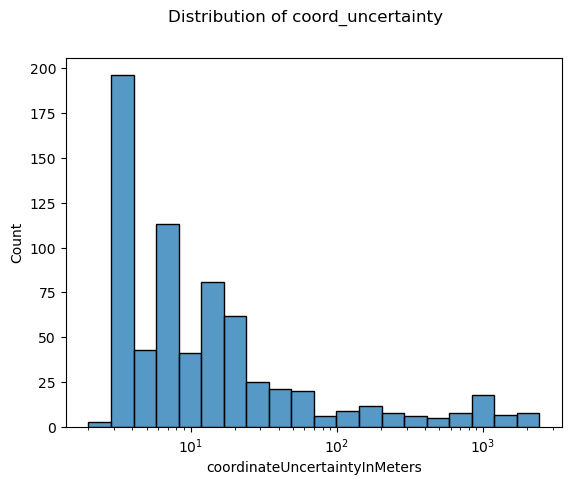

In [10]:
x = sns.histplot( df, x = 'coordinateUncertaintyInMeters', log_scale= True)
save_plt('coord_uncertainty')

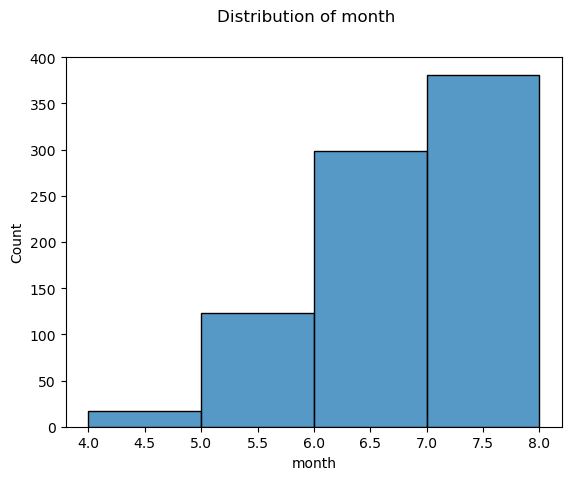

In [11]:
sns.histplot( df, x = 'month',binwidth=1)
save_plt('month')

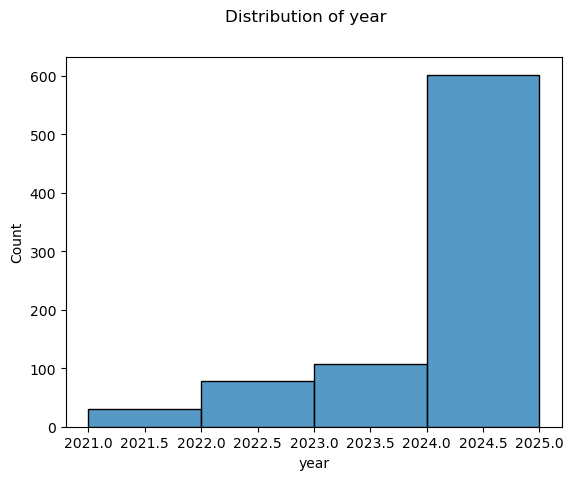

In [12]:
sns.histplot( df, x = 'year',binwidth=1)
save_plt('year')

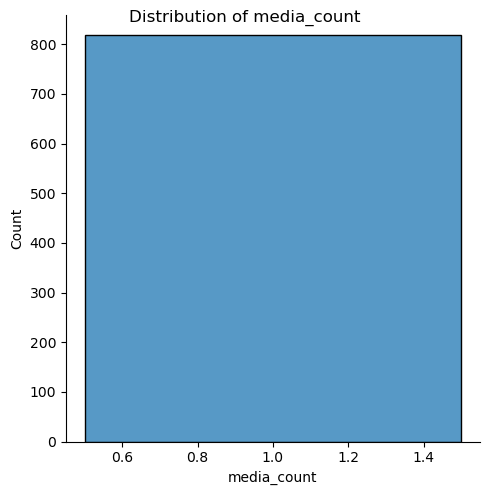

In [13]:
sns.displot( df, x = 'media_count')
save_plt('media_count')

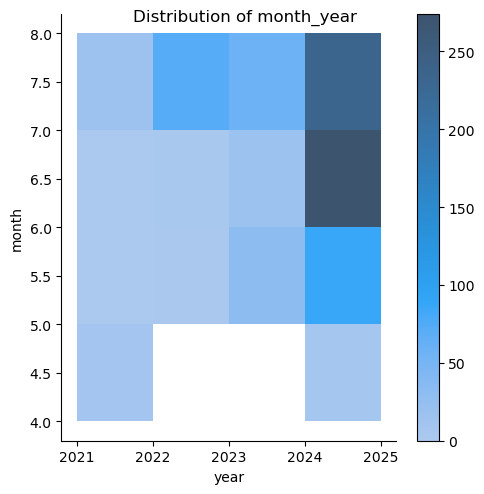

In [14]:
sns.displot(df, x="year", y="month", binwidth=(1,1), cbar=True)
save_plt('month_year', type='rel')

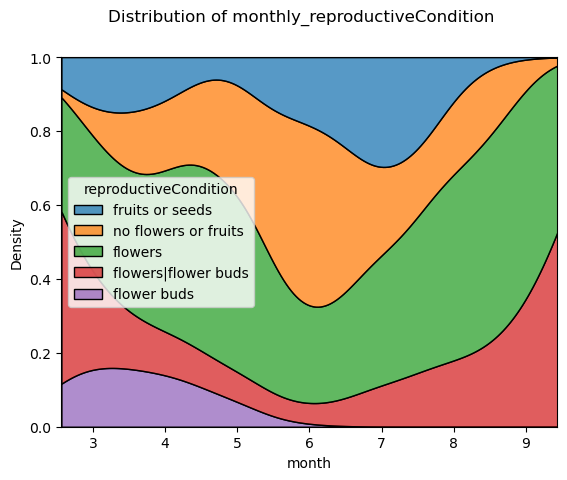

In [23]:
sns.kdeplot( df, x = 'month', hue = 'reproductiveCondition', multiple='fill')
save_plt('monthly_reproductiveCondition')

/tmp/ipykernel_17827/3310002810.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot( df, x = 'month', hue = 'annotations', multiple='fill')


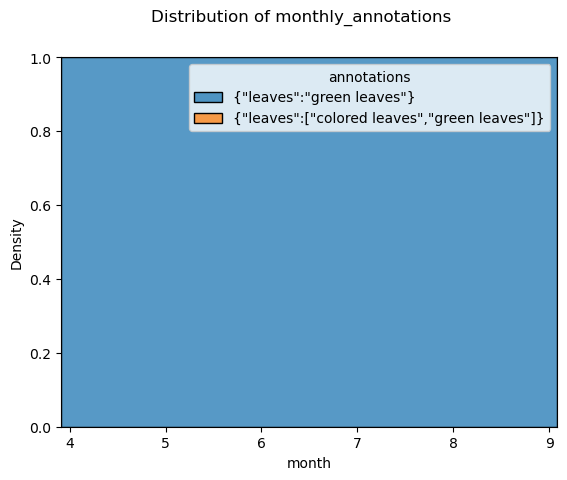

In [22]:
sns.kdeplot( df, x = 'month', hue = 'annotations', multiple='fill')
save_plt('monthly_annotations')

/tmp/ipykernel_17827/1322530680.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot( df, x = 'month', hue = 'iucnRedListCategory', multiple='fill')


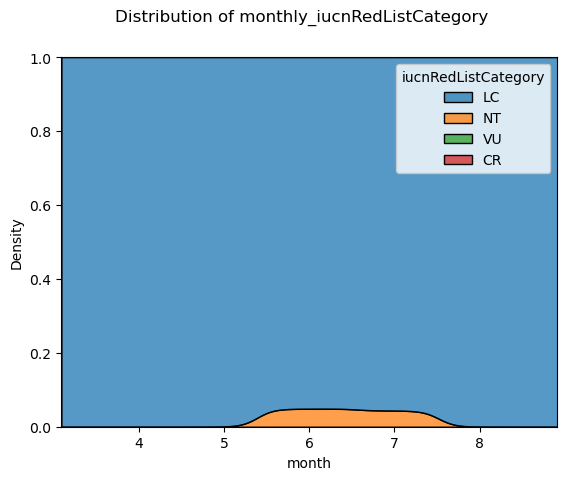

In [17]:
sns.kdeplot( df, x = 'month', hue = 'iucnRedListCategory', multiple='fill')
save_plt('monthly_iucnRedListCategory')

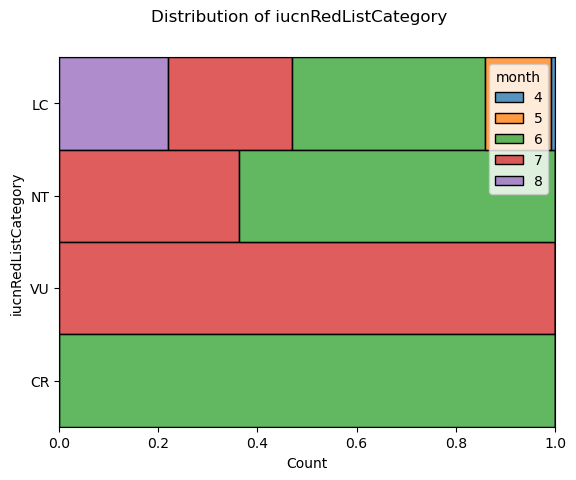

In [24]:
sns.histplot( df, y = 'iucnRedListCategory', multiple='fill', hue = 'month', legend=True, palette ='tab10')
save_plt('iucnRedListCategory')

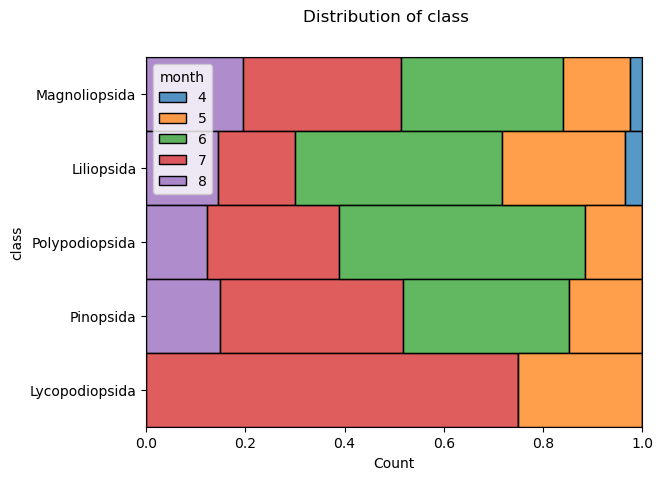

In [32]:
sns.histplot( df, y = 'class', multiple='fill', hue = 'month', legend=True, palette ='tab10')
save_plt('class',"fill")

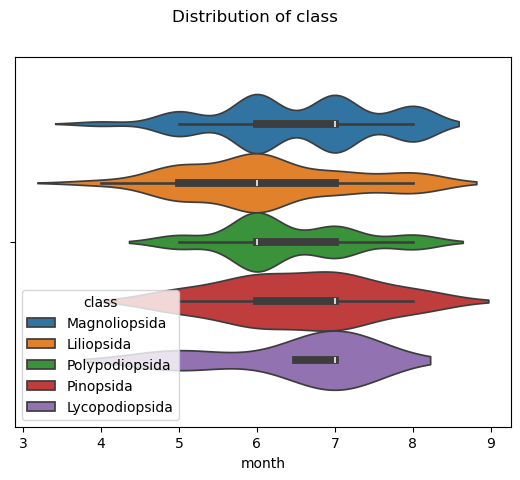

In [38]:
sns.violinplot( df, x="month",  hue = 'class', legend=True, palette ='tab10')
save_plt('class',"violin")

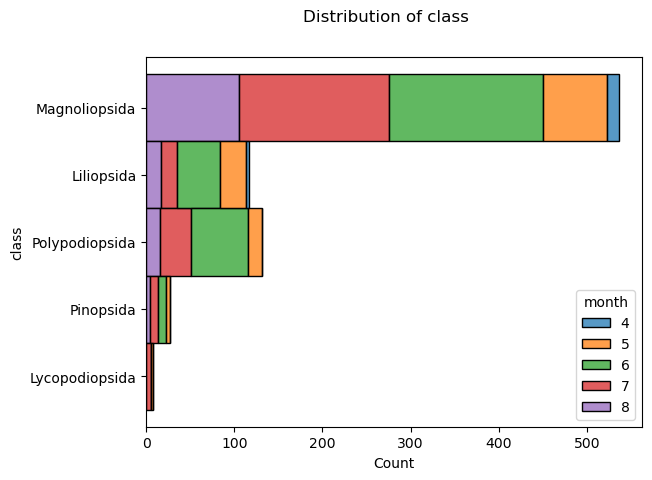

In [33]:
sns.histplot( df, y = 'class', multiple='stack', hue = 'month', legend=True, palette ='tab10')
save_plt('class',"stack")

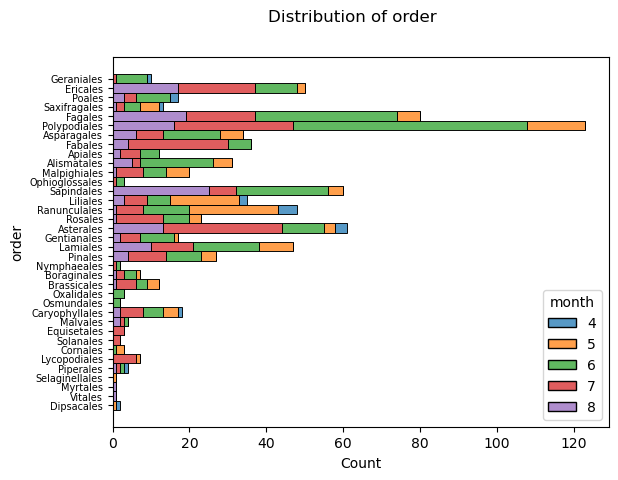

In [31]:
ax = sns.histplot( df, y = 'order', multiple='stack', hue = 'month', legend=True, palette ='tab10')
plt.yticks(fontsize = 7)
save_plt('order', "stack")

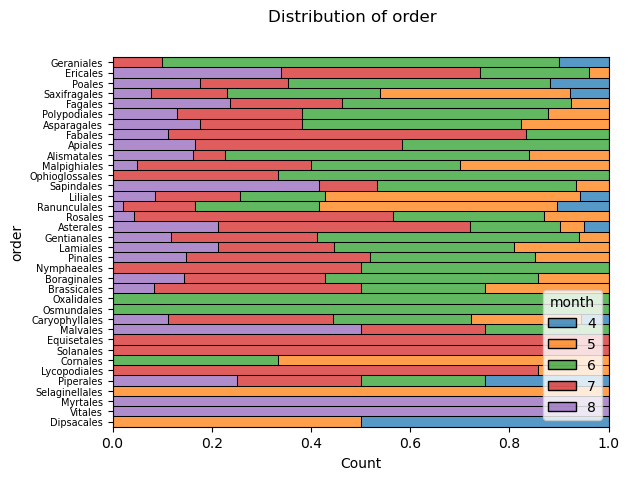

In [30]:
ax = sns.histplot( df, y = 'order', multiple='fill', hue = 'month', legend=True, palette ='tab10')
plt.yticks(fontsize = 7)
save_plt('order',"fill")

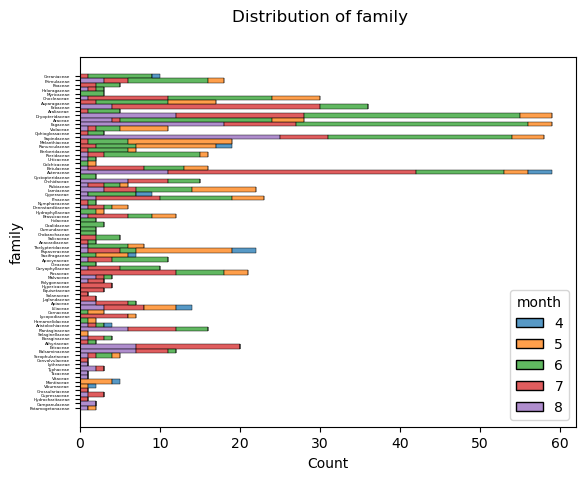

In [28]:
ax = sns.histplot( df, y = 'family', multiple='stack', hue = 'month', legend=True, palette ='tab10')
plt.yticks(fontsize = 3)
save_plt('family', "stack")

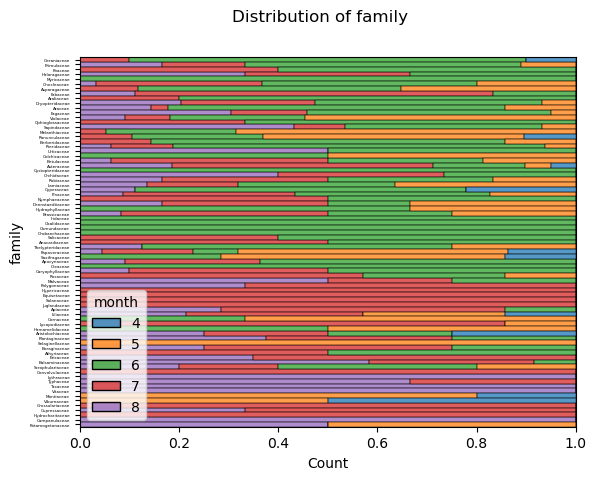

In [29]:
ax = sns.histplot( df, y = 'family', multiple='fill', hue = 'month', legend=True, palette ='tab10')
plt.yticks(fontsize = 3)
save_plt('family', "fill")